<a href="https://colab.research.google.com/github/albordunos/topic_modeling/blob/main/LDA_TG_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
!pip install pandas xlrd nltk gensim pyLDAvis chardet matplotlib wordcloud razdel pymorphy2 stopwords

# –ò–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  # –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä
import re
import string
from gensim import corpora
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import chardet
from gensim.models import Phrases  # –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –∫–ª–∞—Å—Å Phrases
from gensim.models.coherencemodel import CoherenceModel  # –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º CoherenceModel
import matplotlib.pyplot as plt  # –î–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
from wordcloud import WordCloud
from razdel import tokenize
from nltk.corpus import stopwords
import pymorphy2
import stopwords  # –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –±–∏–±–ª–∏–æ—Ç–µ–∫—É stopwords

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ä–µ—Å—É—Ä—Å–æ–≤ NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
# === 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö ===
# –£–∫–∞–∂–∏—Ç–µ –ø—É—Ç—å –∫ —Ñ–∞–π–ª—É .csv
file_path = '/content/MID1.csv'

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–¥–∏—Ä–æ–≤–∫–∏ —Ñ–∞–π–ª–∞
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))
    detected_encoding = result['encoding']
    print(f"–û–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–∞—è –∫–æ–¥–∏—Ä–æ–≤–∫–∞: {detected_encoding}")

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

–û–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–∞—è –∫–æ–¥–∏—Ä–æ–≤–∫–∞: UTF-16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# –ß—Ç–µ–Ω–∏–µ CSV-—Ñ–∞–π–ª–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π –∫–æ–¥–∏—Ä–æ–≤–∫–∏ –∏ –æ–±—Ä–∞–±–æ—Ç–∫–æ–π –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã—Ö —Å—Ç—Ä–æ–∫
df = pd.read_csv(file_path, encoding=detected_encoding, sep=';', on_bad_lines='skip')

# –í—ã–≤–æ–¥ –ø–µ—Ä–≤—ã—Ö —Å—Ç—Ä–æ–∫ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
print(df.head())

                        date  message_id  reply_to_msg_id   channel_name  \
0  2025-01-06 16:15:21+00:00       50411              NaN  –ú–ò–î –†–æ—Å—Å–∏–∏ üá∑üá∫   
1  2025-01-06 16:00:02+00:00       50410              NaN  –ú–ò–î –†–æ—Å—Å–∏–∏ üá∑üá∫   
2  2025-01-06 12:02:33+00:00       50409              NaN  –ú–ò–î –†–æ—Å—Å–∏–∏ üá∑üá∫   
3  2025-01-06 10:15:02+00:00       50408              NaN  –ú–ò–î –†–æ—Å—Å–∏–∏ üá∑üá∫   
4  2025-01-05 15:05:12+00:00       50407              NaN  –ú–ò–î –†–æ—Å—Å–∏–∏ üá∑üá∫   

   channel_id  sender  sender_id  \
0  1065276858     NaN         -1   
1  1065276858     NaN         -1   
2  1065276858     NaN         -1   
3  1065276858     NaN         -1   
4  1065276858     NaN         -1   

                                             message   views  comments  \
0  ‚ö°Ô∏è[**–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π**](https://mid.ru/ru/foreign_...  166781       NaN   
1  **üá∑üá∫üá≤üá© –ó–∞—è–≤–ª–µ–Ω–∏–µ –ü–æ—Å–æ–ª—å—Å—Ç–≤–∞ –†–æ—Å—Å–∏–π—Å–∫–æ–π –§–µ–

In [10]:
# –£–∫–∞–∂–∏—Ç–µ –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞ —Å —Ç–µ–∫—Å—Ç–æ–º
text_column = 'message'  # –ó–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ —Ä–µ–∞–ª—å–Ω–æ–µ –Ω–∞–∑–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–∞

# –í—ã–≤–æ–¥ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Å—Ç—Ä–æ–∫ –∏ —Å–ª–æ–≤ –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
num_rows = df.shape[0]
num_words = df[text_column].str.split().str.len().sum()  # –°—á–∏—Ç–∞–µ–º –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ —É–∫–∞–∑–∞–Ω–Ω–æ–º —Å—Ç–æ–ª–±—Ü–µ

print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {num_rows}')
print(f'–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {num_words}')

 # === 2. –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ ===
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–≤–æ–∏—Ö —Å—Ç–æ–ø-—Å–ª–æ–≤
custom_stop_words = ['–º–∏–¥', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Å–∏–∏', '–∫–æ—Ç–æ—Ä—ã–π', '–∫–æ—Ç–æ—Ä—ã–µ', '–∫–æ—Ç–æ—Ä—ã—Ö', '—Ç–∞–∫–∂–µ', '–∏–º–µ–Ω–Ω–æ', '–≤–∫–ª—é—á–∞—è', '—Å–µ–≥–æ–¥–Ω—è', '–ª–∞–≤—Ä–æ–≤', '–∑–∞—Ö–∞—Ä–æ–≤–∞', '–º–∏–Ω–∏–º—Ç—Ä', '–∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö', '–¥–µ–ª', '–≥–æ–¥', '—Ä–æ—Å—Å–∏–π—Å–∫–∏–π', '—Ñ–µ–¥–µ—Ä–∞—Ü–∏—è']

# –ü–æ–ª—É—á–∞–µ–º —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ –¥–ª—è —Ä—É—Å—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ stopwords
russian_stop_words = stopwords.get_stopwords('ru')

# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º–∏ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞–º–∏
stop_words = set(russian_stop_words + custom_stop_words)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä–∞
morph = pymorphy2.MorphAnalyzer()  # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –ª–µ–º–º–∞—Ç–∏–∑–∞—Ç–æ—Ä–∞ pymorphy2

def preprocess_text(text):
    if pd.isna(text):  # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ NaN
        return []

    # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = text.lower()

    # –£–¥–∞–ª–µ–Ω–∏–µ URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # –£–¥–∞–ª—è–µ–º URL

    # –£–¥–∞–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ —á–∏—Å–µ–ª, –∞ —Ç–∞–∫–∂–µ –ª–∏—à–Ω–∏—Ö –ø—Ä–æ–±–µ–ª–æ–≤
    text = re.sub(r'[^\w\s]', ' ', text)  # –ó–∞–º–µ–Ω—è–µ–º –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é –Ω–∞ –ø—Ä–æ–±–µ–ª
    text = re.sub(r'\d+', '', text)  # –£–¥–∞–ª—è–µ–º —á–∏—Å–ª–∞
    text = re.sub(r'\s+', ' ', text)  # –ó–∞–º–µ–Ω—è–µ–º –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–æ–±–µ–ª–æ–≤ –Ω–∞ –æ–¥–∏–Ω
    text = text.strip()  # –£–¥–∞–ª–µ–Ω–∏–µ –ø—Ä–æ–±–µ–ª–æ–≤ –≤ –Ω–∞—á–∞–ª–µ –∏ –∫–æ–Ω—Ü–µ —Å—Ç—Ä–æ–∫–∏

    # –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞
    tokens = word_tokenize(text)

    # –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è —Ç–æ–∫–µ–Ω–æ–≤ –∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è: —É–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–∞–ª—Ñ–∞–≤–∏—Ç–Ω—ã—Ö –∏ —Å—Ç–æ–ø-—Å–ª–æ–≤
    filtered_tokens = [
        morph.parse(token.text)[0].normal_form
        for token in tokenize(text)
        if token.text.isalnum() and token.text not in stop_words and len(token.text) > 2
    ]

    return filtered_tokens  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Å–ø–∏—Å–æ–∫ —Ç–æ–∫–µ–Ω–æ–≤


# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –æ—á–∏—Å—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –∫ —É–∫–∞–∑–∞–Ω–Ω–æ–º—É —Å—Ç–æ–ª–±—Ü—É
df['cleaned_text'] = df[text_column].astype(str).apply(preprocess_text)

# === 3. –°–æ–∑–¥–∞–Ω–∏–µ n-–≥—Ä–∞–º–º ===
# –°–æ–∑–¥–∞–µ–º –º–æ–¥–µ–ª—å –±–∏–≥—Ä–∞–º–º
bigram_model = Phrases(df['cleaned_text'], min_count=5, threshold=10)

# –ü—Ä–∏–º–µ–Ω—è–µ–º –±–∏–≥—Ä–∞–º–º–Ω—É—é –º–æ–¥–µ–ª—å –∫ –æ—á–∏—â–µ–Ω–Ω—ã–º —Ç–æ–∫–µ–Ω–∞–º
df['bigrams'] = df['cleaned_text'].apply(lambda tokens: bigram_model[tokens])

# === 4. –°–æ–∑–¥–∞–Ω–∏–µ –∫–æ—Ä–ø—É—Å–∞ –∏ —Å–ª–æ–≤–∞—Ä—è ===
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –æ—á–∏—â–µ–Ω–Ω—ã–µ —Ç–µ–∫—Å—Ç—ã –≤ —Å–ø–∏—Å–æ–∫ —Ç–æ–∫–µ–Ω–æ–≤
tokenized_texts = df['cleaned_text'].tolist()  # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ —Å–ø–∏—Å–∫–æ–≤ —Ç–æ–∫–µ–Ω–æ–≤
tokenized_bigrams = df['bigrams'].tolist()  # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –±–∏–≥—Ä–∞–º–º

# –°–æ–∑–¥–∞–µ–º —Å–ª–æ–≤–∞—Ä—å (gensim Dictionary)
dictionary = corpora.Dictionary(tokenized_texts + tokenized_bigrams)

# –£–¥–∞–ª–µ–Ω–∏–µ —Ä–µ–¥–∫–∏—Ö –∏ —Å–ª–∏—à–∫–æ–º —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤ (–ø–æ –∂–µ–ª–∞–Ω–∏—é)
dictionary.filter_extremes(no_below=5, no_above=0.7)

# –°–æ–∑–¥–∞–µ–º –∫–æ—Ä–ø—É—Å (—Å–ø–∏—Å–æ–∫ –º–µ—à–∫–æ–≤ —Å–ª–æ–≤)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts + tokenized_bigrams]

# === 5. TF-IDF –º–æ–¥–µ–ª—å ===
# –ü—Ä–∏–º–µ–Ω—è–µ–º TF-IDF –º–æ–¥–µ–ª—å –∫ –∫–æ—Ä–ø—É—Å—É
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# –í—ã–≤–æ–¥ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∏ –ø–µ—Ä–≤—ã—Ö —Å—Ç—Ä–æ–∫ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
num_docs = len(tokenized_texts)
num_words = sum([len(tokens) for tokens in tokenized_texts])
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ (—Å—Ç—Ä–æ–∫): {num_docs}")
print(f"–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤: {num_words}")
print(df[['message', 'cleaned_text', 'bigrams']].head())

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 47987
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤ –≤ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: 3767056
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ (—Å—Ç—Ä–æ–∫): 47987
–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤: 2512658
                                             message  \
0  ‚ö°Ô∏è[**–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π**](https://mid.ru/ru/foreign_...   
1  **üá∑üá∫üá≤üá© –ó–∞—è–≤–ª–µ–Ω–∏–µ –ü–æ—Å–æ–ª—å—Å—Ç–≤–∞ –†–æ—Å—Å–∏–π—Å–∫–æ–π –§–µ–¥–µ—Ä–∞—Ü...   
2  ‚úçÔ∏è [–°—Ç–∞—Ç—å—è](https://globalaffairs.ru/articles/...   
3  ‚ùóÔ∏è**–ö–∏–µ–≤—Å–∫–∏–π —Ä–µ–∂–∏–º –Ω–µ –ø—Ä–µ–∫—Ä–∞—â–∞–µ—Ç –ø—Ä–æ–≤–æ–∫–∞—Ü–∏–∏ —Å ...   
4  #–ü—Ä–µ—Å—Ç—É–ø–ª–µ–Ω–∏—è–ö–∏–µ–≤—Å–∫–æ–≥–æ–†–µ–∂–∏–º–∞  [‚ùóÔ∏è ](https://t....   

                                        cleaned_text  \
0  [–∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π, –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω—ã–π, –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—å, –∑–∞—Ö–∞...   
1  [–∑–∞—è–≤–ª–µ–Ω–∏–µ, –ø–æ—Å–æ–ª—å—Å—Ç–≤–æ, —Ä–æ—Å—Å–∏–π—Å–∫–∏–π, —Ñ–µ–¥–µ—Ä–∞—Ü–∏—è,...   
2  [—Å—Ç–∞—Ç—å—è, 

In [11]:
#====6 –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏====
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–º
num_topics = int(input("–í–≤–µ–¥–∏—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º: "))

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ LDA —Å –∑–∞–¥–∞–Ω–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ç–µ–º
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=5)

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–π —Ç–µ–º—ã –¥–ª—è –¥–æ–∫—É–º–µ–Ω—Ç–∞
def get_dominant_topic(lda_model, doc_topics):
    return max(doc_topics, key=lambda item: item[1])

# –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–º –¥–ª—è –≤—Å–µ—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
doc_topics = lda_model.get_document_topics(corpus)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
for idx, topic in lda_model.print_topics(-1):
    print('–¢–µ–º–∞: {}'.format(idx))
    print('–°–ª–æ–≤–∞: {}'.format(topic))

    # –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ —Ç–µ–º–µ
    doc_topics = lda_model.get_document_topics(corpus)
    docs = [doc_id for doc_id, topic_values in enumerate(doc_topics) if max(topic_values, key=lambda x: x[1])[0] == idx]

    # –í—ã–≤–æ–¥ –Ω–æ–º–µ—Ä–æ–≤ —Å—Ç—Ä–æ–∫ –¥–ª—è —Ç–µ–º—ã
    print('–î–æ–∫—É–º–µ–Ω—Ç—ã (—Å—Ç—Ä–æ–∫–∏):', docs)
    print()



–í–≤–µ–¥–∏—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–µ–º: 8
–¢–µ–º–∞: 0
–°–ª–æ–≤–∞: 0.020*"—Ä–æ—Å—Å–∏–π—Å–∫–∏–π" + 0.011*"—Å–≤—è–∑—å" + 0.009*"—Å—Ç–æ—Ä–æ–Ω–∞" + 0.008*"—Å–º–∏" + 0.007*"–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—å" + 0.007*"–∂—É—Ä–Ω–∞–ª–∏—Å—Ç" + 0.007*"–æ—Ç–Ω–æ—à–µ–Ω–∏–µ" + 0.006*"–≤–æ–ø—Ä–æ—Å" + 0.006*"–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è" + 0.006*"—Ä–æ—Å—Å–∏–π—Å–∫–∏–π_—Ñ–µ–¥–µ—Ä–∞—Ü–∏—è"
–î–æ–∫—É–º–µ–Ω—Ç—ã (—Å—Ç—Ä–æ–∫–∏): [5, 6, 20, 29, 116, 157, 168, 183, 184, 185, 187, 200, 201, 210, 273, 287, 313, 350, 359, 377, 385, 413, 427, 442, 462, 470, 539, 561, 612, 616, 643, 675, 690, 692, 716, 730, 731, 757, 766, 768, 790, 815, 847, 861, 873, 877, 881, 904, 912, 914, 933, 948, 1073, 1082, 1091, 1096, 1160, 1197, 1255, 1328, 1353, 1372, 1426, 1448, 1449, 1492, 1493, 1511, 1515, 1536, 1539, 1542, 1579, 1580, 1601, 1622, 1679, 1682, 1700, 1721, 1755, 1759, 1796, 1816, 1817, 1819, 1847, 1877, 1908, 1911, 1915, 1929, 1932, 1940, 2000, 2050, 2082, 2138, 2214, 2217, 2227, 2316, 2318, 2481, 2521, 2576, 2665, 2690, 2700, 2708, 2

In [12]:
# === 7.1 –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ç–µ–º —Å –ø–æ–º–æ—â—å—é pyLDAvis ===
# –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

# --- 7.2. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–º (pyLDAvis) ---
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.116331 -0.023259       1        1  24.293119
1      0.116776  0.166873       2        1  20.642162
7      0.068510  0.020600       3        1  13.912192
3      0.000990  0.239469       4        1  12.619146
0      0.114732 -0.002913       5        1  10.308262
6      0.016727 -0.271164       6        1   9.273803
4      0.041416 -0.145453       7        1   7.307080
5     -0.475482  0.015848       8        1   1.644236, topic_info=                       Term          Freq         Total Category  logprob  \
815            mediamessage  18943.000000  18943.000000  Default  30.0000   
927                 –º–∏–Ω–∏—Å—Ç—Ä  19177.000000  19177.000000  Default  29.0000   
404               –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç  10687.000000  10687.000000  Default  28.0000   
380                     –æ–æ–Ω  16001.000000  16001.000000  Default  27.0000   
291                 —É–∫—Ä–∞–∏–Ω–∞  16708.000000  16708.000000  Default  26.0000   
...                     ...           ...           ...      ...      ...   
4087               –∫–∏—Ä–≥–∏–∑–∏—è    438.631924    492.431010   Topic8  -5.1172   
24557   —Ç—É—Ä–µ—Ü–∫–∏–π_—Ä–µ—Å–ø—É–±–ª–∏–∫–∞    315.366008    480.076132   Topic8  -5.4472   
404               –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç    774.541899  10687.326342   Topic8  -4.5486   
24545  —Ä–µ—Å–ø—É–±–ª–∏–∫–∞_–∫–∞–∑–∞—Ö—Å—Ç–∞–Ω    259.837362    470.630027   Topic8  -5.6408   
23641       –ø—Ä–µ–º—å–µ—Ä_–º–∏–Ω–∏—Å—Ç—Ä    279.328002   1799.812262   Topic8  -5.5685   

       loglift  
815    30.0000  
927    29.0000  
404    28.0000  
380    27.0000  
291    26.0000  
...        ...  
4087    3.9922  
24557   3.6877  
404     1.4834  
24545   3.5139  
23641   2.2448  

[571 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
815       8  0.999912  mediamessage
3972      1  0.083047        –∞–≤–≥—É—Å—Ç
3972      2  0.062771        –∞–≤–≥—É—Å—Ç
3972      3  0.009166        –∞–≤–≥—É—Å—Ç
3972      4  0.239697        –∞–≤–≥—É—Å—Ç
...     ...       ...           ...
814       3  0.268547        —é–Ω–µ—Å–∫–æ
814       5  0.730330        —é–Ω–µ—Å–∫–æ
1646      1  0.067614          —è–∑—ã–∫
1646      3  0.800216          —è–∑—ã–∫
1646      5  0.131743          —è–∑—ã–∫

[1222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 8, 4, 1, 7, 5, 6])

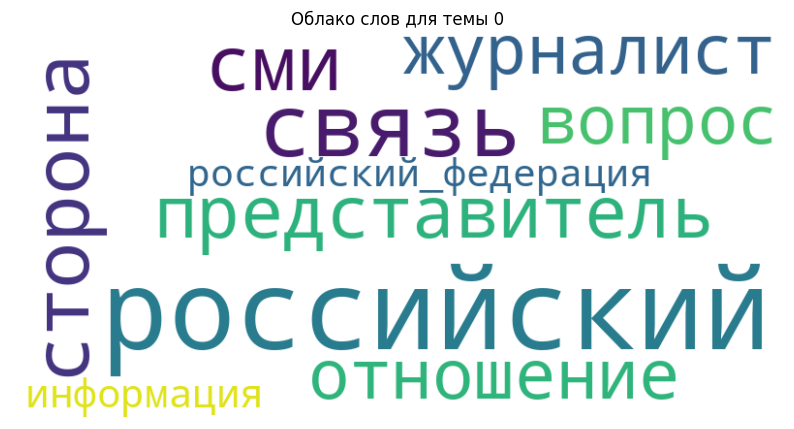

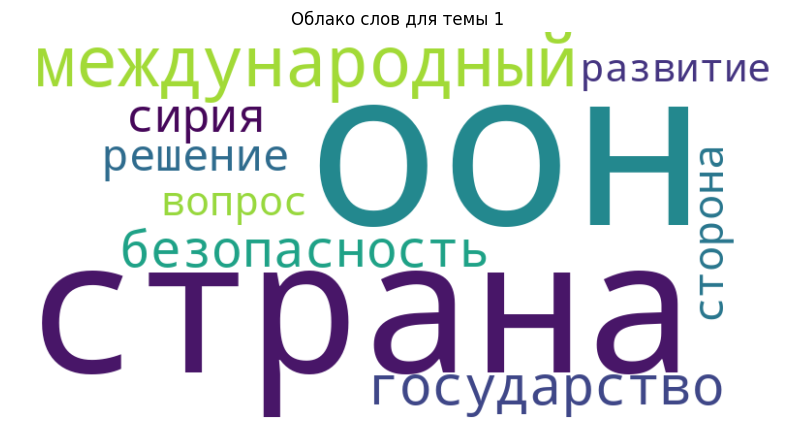

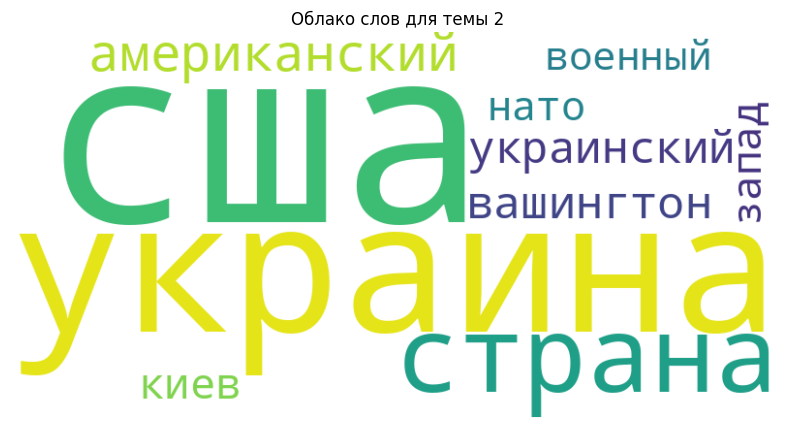

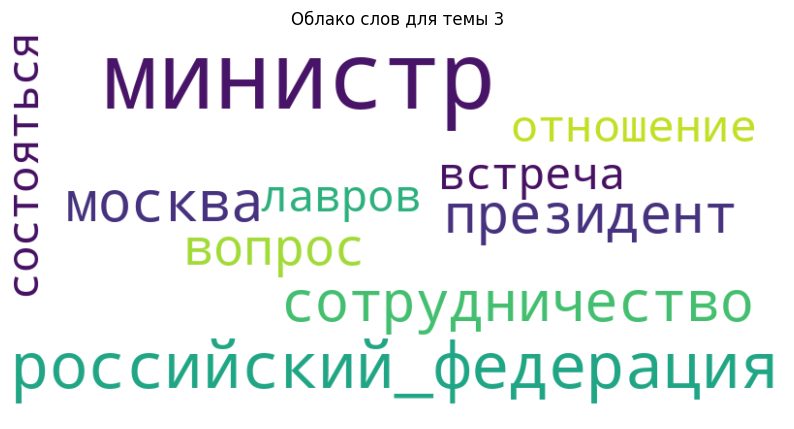

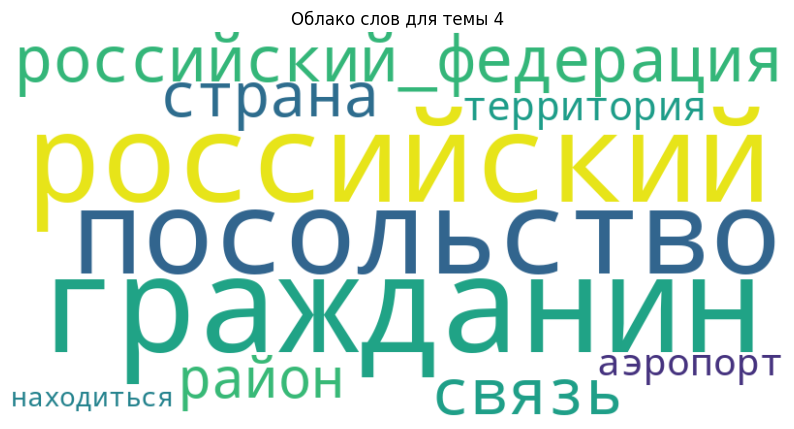

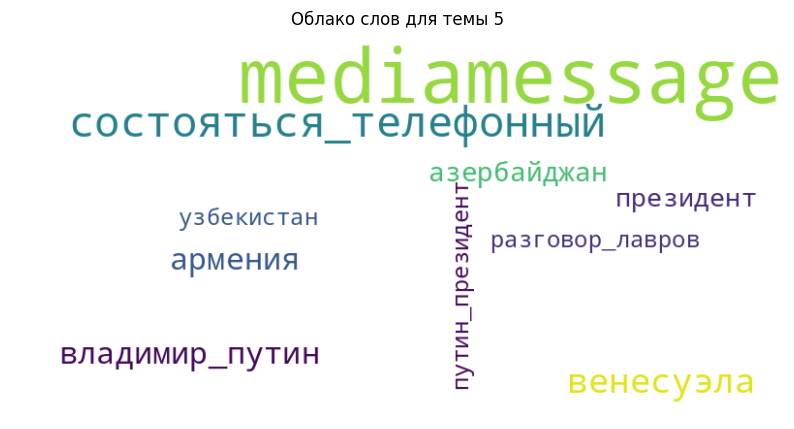

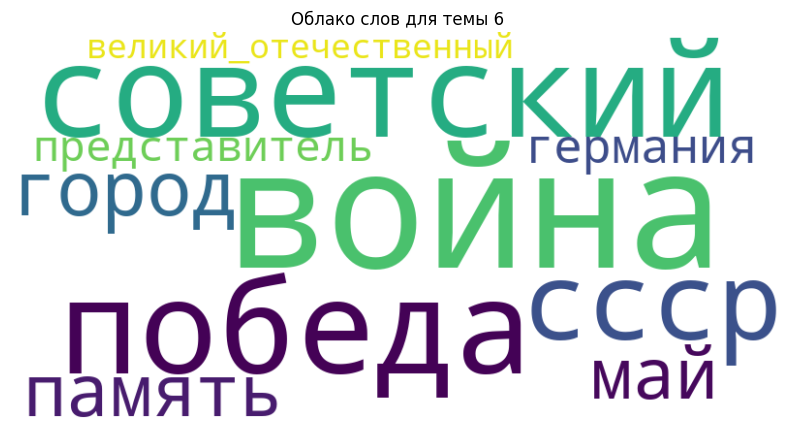

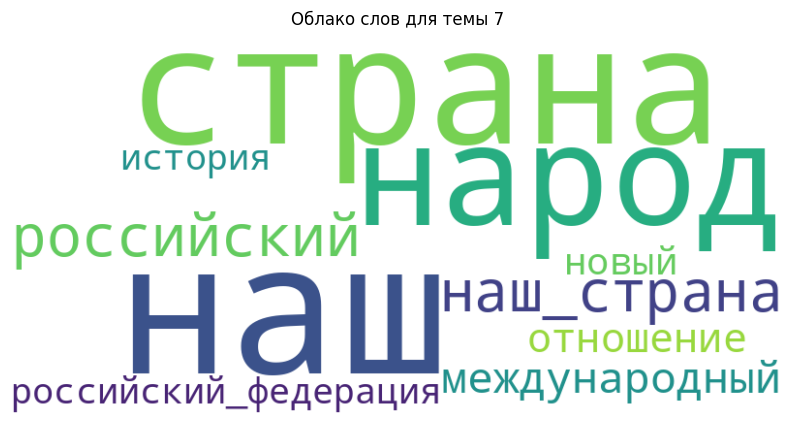

In [20]:
# === 8. –ü–æ–ª—É—á–µ–Ω–∏–µ –Ω–∞–∏–±–æ–ª–µ–µ –≤–µ—Ä–æ—è—Ç–Ω—ã—Ö —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã ===
topics_words = lda_model.show_topics(formatted=False)

# === 9. –û–±–ª–∞–∫–∞ —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã ===
# –°–æ–∑–¥–∞–Ω–∏–µ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π —Ç–µ–º—ã
for topic_id, topic in topics_words:
    word_freq = {word: freq for word, freq in topic}

    # –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –¥–ª—è —Ç–µ–º—ã {topic_id}')
    plt.show()

In [65]:
#=== 10. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ ===
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ —Å–ª–æ–≤–∞—Ä—è (–ø–æ –∂–µ–ª–∞–Ω–∏—é)
lda_model.save('/content/lda_model.gensim')
dictionary.save('/content/dictionary.gensim')

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –æ—á–∏—â–µ–Ω–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç–∞
df.to_csv('/content/cleaned_texts.csv', index=False)
print("–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Ñ–∞–π–ª: /content/cleaned_texts.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ —Ñ–∞–π–ª: /content/cleaned_texts.csv


In [32]:
!pip install pandas openpyxl  # –î–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –≤ .xlsx


# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–æ–º–∏–Ω–∏—Ä—É—é—â–µ–π —Ç–µ–º—ã –¥–ª—è –¥–æ–∫—É–º–µ–Ω—Ç–∞
def get_dominant_topic(doc_topics):
    return max(doc_topics, key=lambda item: item[1])

# –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–µ–º –¥–ª—è –≤—Å–µ—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤
doc_topics = lda_model.get_document_topics(corpus)

# –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
data = []

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∏ —Å–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö
for idx, topic in lda_model.print_topics(-1):
    print('–¢–µ–º–∞: {}'.format(idx))
    print('–°–ª–æ–≤–∞: {}'.format(topic))

    # –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤, –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ —Ç–µ–º–µ
    docs = [doc_id for doc_id, topic_values in enumerate(doc_topics) if get_dominant_topic(topic_values)[0] == idx]

    # –î–æ–±–∞–≤–ª—è–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ç–µ–º–µ –∏ —Å–≤—è–∑–∞–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ö –≤ —Å–ø–∏—Å–æ–∫
    for doc_id in docs:
        data.append({'Topic ID': idx, 'Words': topic, 'Document ID': doc_id})

    # –í—ã–≤–æ–¥ –Ω–æ–º–µ—Ä–æ–≤ —Å—Ç—Ä–æ–∫ –¥–ª—è —Ç–µ–º—ã
    print('–î–æ–∫—É–º–µ–Ω—Ç—ã (—Å—Ç—Ä–æ–∫–∏):', docs)
    print()

# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame –∏–∑ —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
df = pd.DataFrame(data)

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ DataFrame –≤ Excel —Ñ–∞–π–ª
df.to_excel('/content/MID1.xlsx', index=False)  # –î–ª—è .xlsx

print("–î–∞–Ω–Ω—ã–µ —É—Å–ø–µ—à–Ω–æ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ /content/MID1.xlsx")


–¢–µ–º–∞: 0
–°–ª–æ–≤–∞: 0.020*"—Ä–æ—Å—Å–∏–π—Å–∫–∏–π" + 0.011*"—Å–≤—è–∑—å" + 0.009*"—Å—Ç–æ—Ä–æ–Ω–∞" + 0.008*"—Å–º–∏" + 0.007*"–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—å" + 0.007*"–∂—É—Ä–Ω–∞–ª–∏—Å—Ç" + 0.007*"–æ—Ç–Ω–æ—à–µ–Ω–∏–µ" + 0.006*"–≤–æ–ø—Ä–æ—Å" + 0.006*"–∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è" + 0.006*"—Ä–æ—Å—Å–∏–π—Å–∫–∏–π_—Ñ–µ–¥–µ—Ä–∞—Ü–∏—è"
–î–æ–∫—É–º–µ–Ω—Ç—ã (—Å—Ç—Ä–æ–∫–∏): [5, 6, 20, 29, 116, 157, 168, 183, 184, 185, 187, 200, 201, 210, 273, 287, 313, 350, 359, 377, 385, 413, 427, 442, 462, 470, 539, 561, 612, 616, 643, 675, 690, 692, 716, 730, 731, 757, 766, 768, 790, 815, 847, 861, 873, 877, 881, 904, 912, 914, 933, 948, 1073, 1082, 1091, 1096, 1160, 1197, 1255, 1328, 1353, 1372, 1426, 1448, 1449, 1492, 1493, 1511, 1515, 1536, 1539, 1542, 1579, 1580, 1601, 1622, 1679, 1682, 1700, 1721, 1755, 1759, 1796, 1816, 1817, 1819, 1847, 1877, 1908, 1911, 1915, 1929, 1932, 1940, 2000, 2050, 2082, 2138, 2214, 2217, 2227, 2316, 2318, 2481, 2521, 2576, 2665, 2690, 2700, 2708, 2726, 2831, 2876, 2880, 2888, 2936, 2981, 3038,